# Machine Learning Tutorial
In this tutorial we are going to see how to solve a problem using **Machine Learning**. 

The problem we are going to solve is to predict what is the price of some houses.
## Models

We need to apply a model to our data and it will returns the price of the houses. The first model we are going to see is the **Decision Tree**.

The Decision Trees are not the models that gives more accurate predictions, but they are easy to understand and they are the basic building block for some of the most used models.

![](http://i.imgur.com/R3ywQsR.png)

In the picture we can see a Decision Tree which uses two **features** and can return four different **outputs** (prices). The features are the data which we are going to use to give an output, these are in the leafs. In this model, the features we are using are:


*   Number of bedrooms
*   Lot size

This isn't the decision tree that we are going to use later but alldecision trees works in the same way. 

## Data exploration
One of the hardest things in machine learning problems is to choose which are good features. Intuitively you could know if some features are not necessary for your prediction. For example if a feature is the area of the houses, we could say that this would be a interesting feature to predict the price. But, if a feature is the name of the last owner, we could say that it isn't necessary to make our predictions.

We always need to see our data and understand it. 

In python we can load, see and modify the data using *pandas*. 


In [37]:
import pandas as pd # Importing pandas

home_data = pd.read_csv('melb_data.csv') # Reading the data. 
                                    # This method returns a dataframe

home_data.head() # We see the features of the 5 first houses

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


*pandas* is an open source, BSD-licensed library providing high performance, easy to use data structures and data analysis tools for the Python programming language.

The most important part of the Pandas library is the DataFrame. A DataFrame holds the type of data you might think of as a table. This is similar to a table in a SQL database.

To see a summary of your data you can use *describe()* method. This gives you some information about your dataset, so you can get some conclusions easily. 


In [38]:
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


For example, the **count**, shows how many rows have non-missing values.

Then, if we see that in a feature, **count** is lower than the ohers, we will know that this feature has missing values, so we need to give some values to those missing values, if we want to use the feature in our model.

To learn more about pandas see https://pandas.pydata.org/pandas-docs/stable/reference/index.html

## Choosing input/output
Now, we are going to build a model (Decision tree) and we will fit it to our data.

To display the features of the database we use *columns* 

In [39]:
import pandas as pd

home_data = pd.read_csv('melb_data.csv')

home_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

On every database we need to check if there exist missing values and do something to work with those features. We can delete the rows that have a missing value, give a null value or give the mean value for that feature. We are going to apply the simplest option for now, we will drop houses from our data.

In [40]:
print("Number of houses before the drop:", len(home_data))
new_data = home_data.dropna(axis=0)
print("Number of houses after the drop:", len(new_data))

Number of houses before the drop: 13580
Number of houses after the drop: 6196


As we can see, we lose the half of the information (this is the worst option but the easiest), but we are going to continue with that.

Now, we are going to select the prediction target, and the features we are going to use.

To select our prediction target (output), we will use dot notation. This pull out the variable selected from the database.


In [0]:
y = new_data.Price

Now we will select the features. In this case we are going to select some features, but in other problems you should take all the features except the prediction target.

In [0]:
x = new_data[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

## Building the model
As we said before, the model we are going to use is a decision tree. In *sklearn* library there exist a lot of different models. 

In [0]:
from sklearn.tree import DecisionTreeRegressor

# 1) Build the model
myModel = DecisionTreeRegressor(random_state=1) # random_state ensure that in each run we will get the same results

# 2) Fit the model
myModel.fit(x, y)

# 3) Make predictions
y_predict = myModel.predict(x)

We have built a model and we have predicted the prices of the houses, but we don't really know how good is our model. To measure the quality of our model we can use **Mean Absolute Error**, that is 

```
error = actual - predicted
```
To do this in python we can use this method from sklearn library:

In [44]:
from sklearn.metrics import mean_absolute_error

print("The Mean Absolute Error is", mean_absolute_error(y, y_predict))



The Mean Absolute Error is 1115.7467183128902


You could think that your model works nicely, because you have only failed at 1115.7467$ predicting the prices of the houses.
The score obtained is called *In-sample* score. That is, we have trained (fitting) the model with a dataset and we have evaluate it with the same dataset. 

## Model validation

To measure how good is our model we need to train with a dataset and evaluate it with a different dataset. That is, we need to predict values from data that aren't used in the building of the model. The dataset used in model-building is called train dataset, and the dataset used in the prediction is called validation/test dataset.

Using the function **train_test_split()** from the sklearn library you can split your data into training and validation data, for both features and target. By default, this function splits the data like 75% of the data to the training set, and 25% of the data for the validation set.



In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

myModel = DecisionTreeRegressor()

myModel.fit(x_train, y_train)

y_predict = myModel.predict(x_test)

print("The Mean Absolute Error is", mean_absolute_error(y_test, y_predict))


The Mean Absolute Error is 272732.75037658704


As we can see the error obtained is so much bigger than the lastone. This mean that our model is not very good to apply it to new data. We can improve this using other models or choosing different features.

**Validation** is an important part in machine learning. You can't know how accurate is your model without doing validation. The validation we have applied is called simple validation. There exist others like k-cross validation, one-hold-out, bootstrap...
This is the easiest and you can use this on your first problems. Later, you can improve it or use others.

## Underfitting  and Overfitting

**Overfitting** is a phenomenom that occurs when we fit the model to the train dataset too much. That means that if we try to predict the prices for new houses, the model can't generalize to these new houses giving bad predictions. 

In the other hand exists **Underfitting**. Underfitting occurs when the model fit too poorly to the training data, giving bad predictions for new data and even for the training dataset.

How can this occurs in a Decision Tree?

If a decision tree have too much leafs, this means that there are a lot of different prices that the model can give. If we have a decision tree with 1000 leafs  and we train with 1000 houses. The model will fit prefectly to the train dataset, but it will give bad results for new houses.

If a decision tree have too few leafs, then we will be splitting the houses in too few groups. So this mean that is poorly fitted to the train dataset.

![](http://i.imgur.com/2q85n9s.png)

If we make an graphic with that parameters we should get that form. We should try to use the Tree Depth that is in the valley between underfitting and overfitting.



In [0]:

validation = []
training = []
tree_deph = []

for i in range(5, 3005, 100):
  myModel = DecisionTreeRegressor(max_leaf_nodes=i)

  myModel.fit(x_train, y_train)

  y_predict = myModel.predict(x_test)

  validation.append(mean_absolute_error(y_test, y_predict))

  y_predict = myModel.predict(x_train)

  training.append(mean_absolute_error(y_train, y_predict))
  tree_deph.append(i)



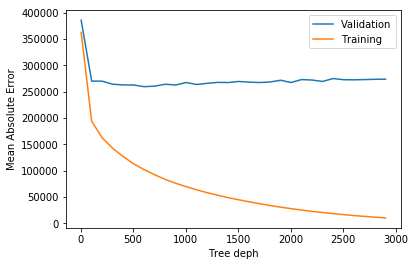

In [73]:
import matplotlib.pyplot as plt

plt.plot(tree_deph, validation, tree_deph, training)
plt.xlabel("Tree deph")
plt.ylabel("Mean Absolute Error")
plt.legend(["Validation", "Training"])
plt.show()

In the image we can see how the mean absolute error for the training dataset dicrease custom to the tree deph increase. About the MAE in validation we see how at the beginning it is too high and custom to the tree deph increase it decreases, but after this, it increases again until it keep stable.

In [85]:
min_index = validation.index(min(validation))
print("The minimum Mean Absolute Error is got with", tree_deph[min_index], "leaf nodes.")

The minimum Mean Absolute Error is got with 605 leaf nodes


## Your turn 
 
Now it's your turn. You have learned something about machine learning and how to handle a problem. You can now improve the model we have built changing parameters or using different features. Yuo can also build another model and compare it with others.